# Heart Disease Prediction

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Data

In [2]:
data = pd.read_csv('heart.csv')
labels=data.iloc[:,-1]
data.drop('target',axis=1,inplace=True)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## Exploratory Data Analysis (EDA)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [5]:
data.isnull().sum(), labels.isnull().sum() #No null values is detected 

(age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 dtype: int64,
 0)

In [6]:
labels.nunique() #no of classes

2

## Univariate Analysis

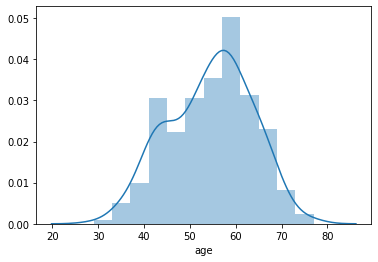

In [7]:
sns.distplot(data['age'])

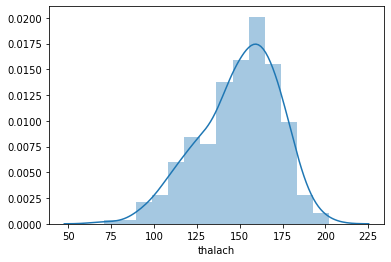

In [8]:
sns.distplot(data['thalach'])

## Multivariate Analysis

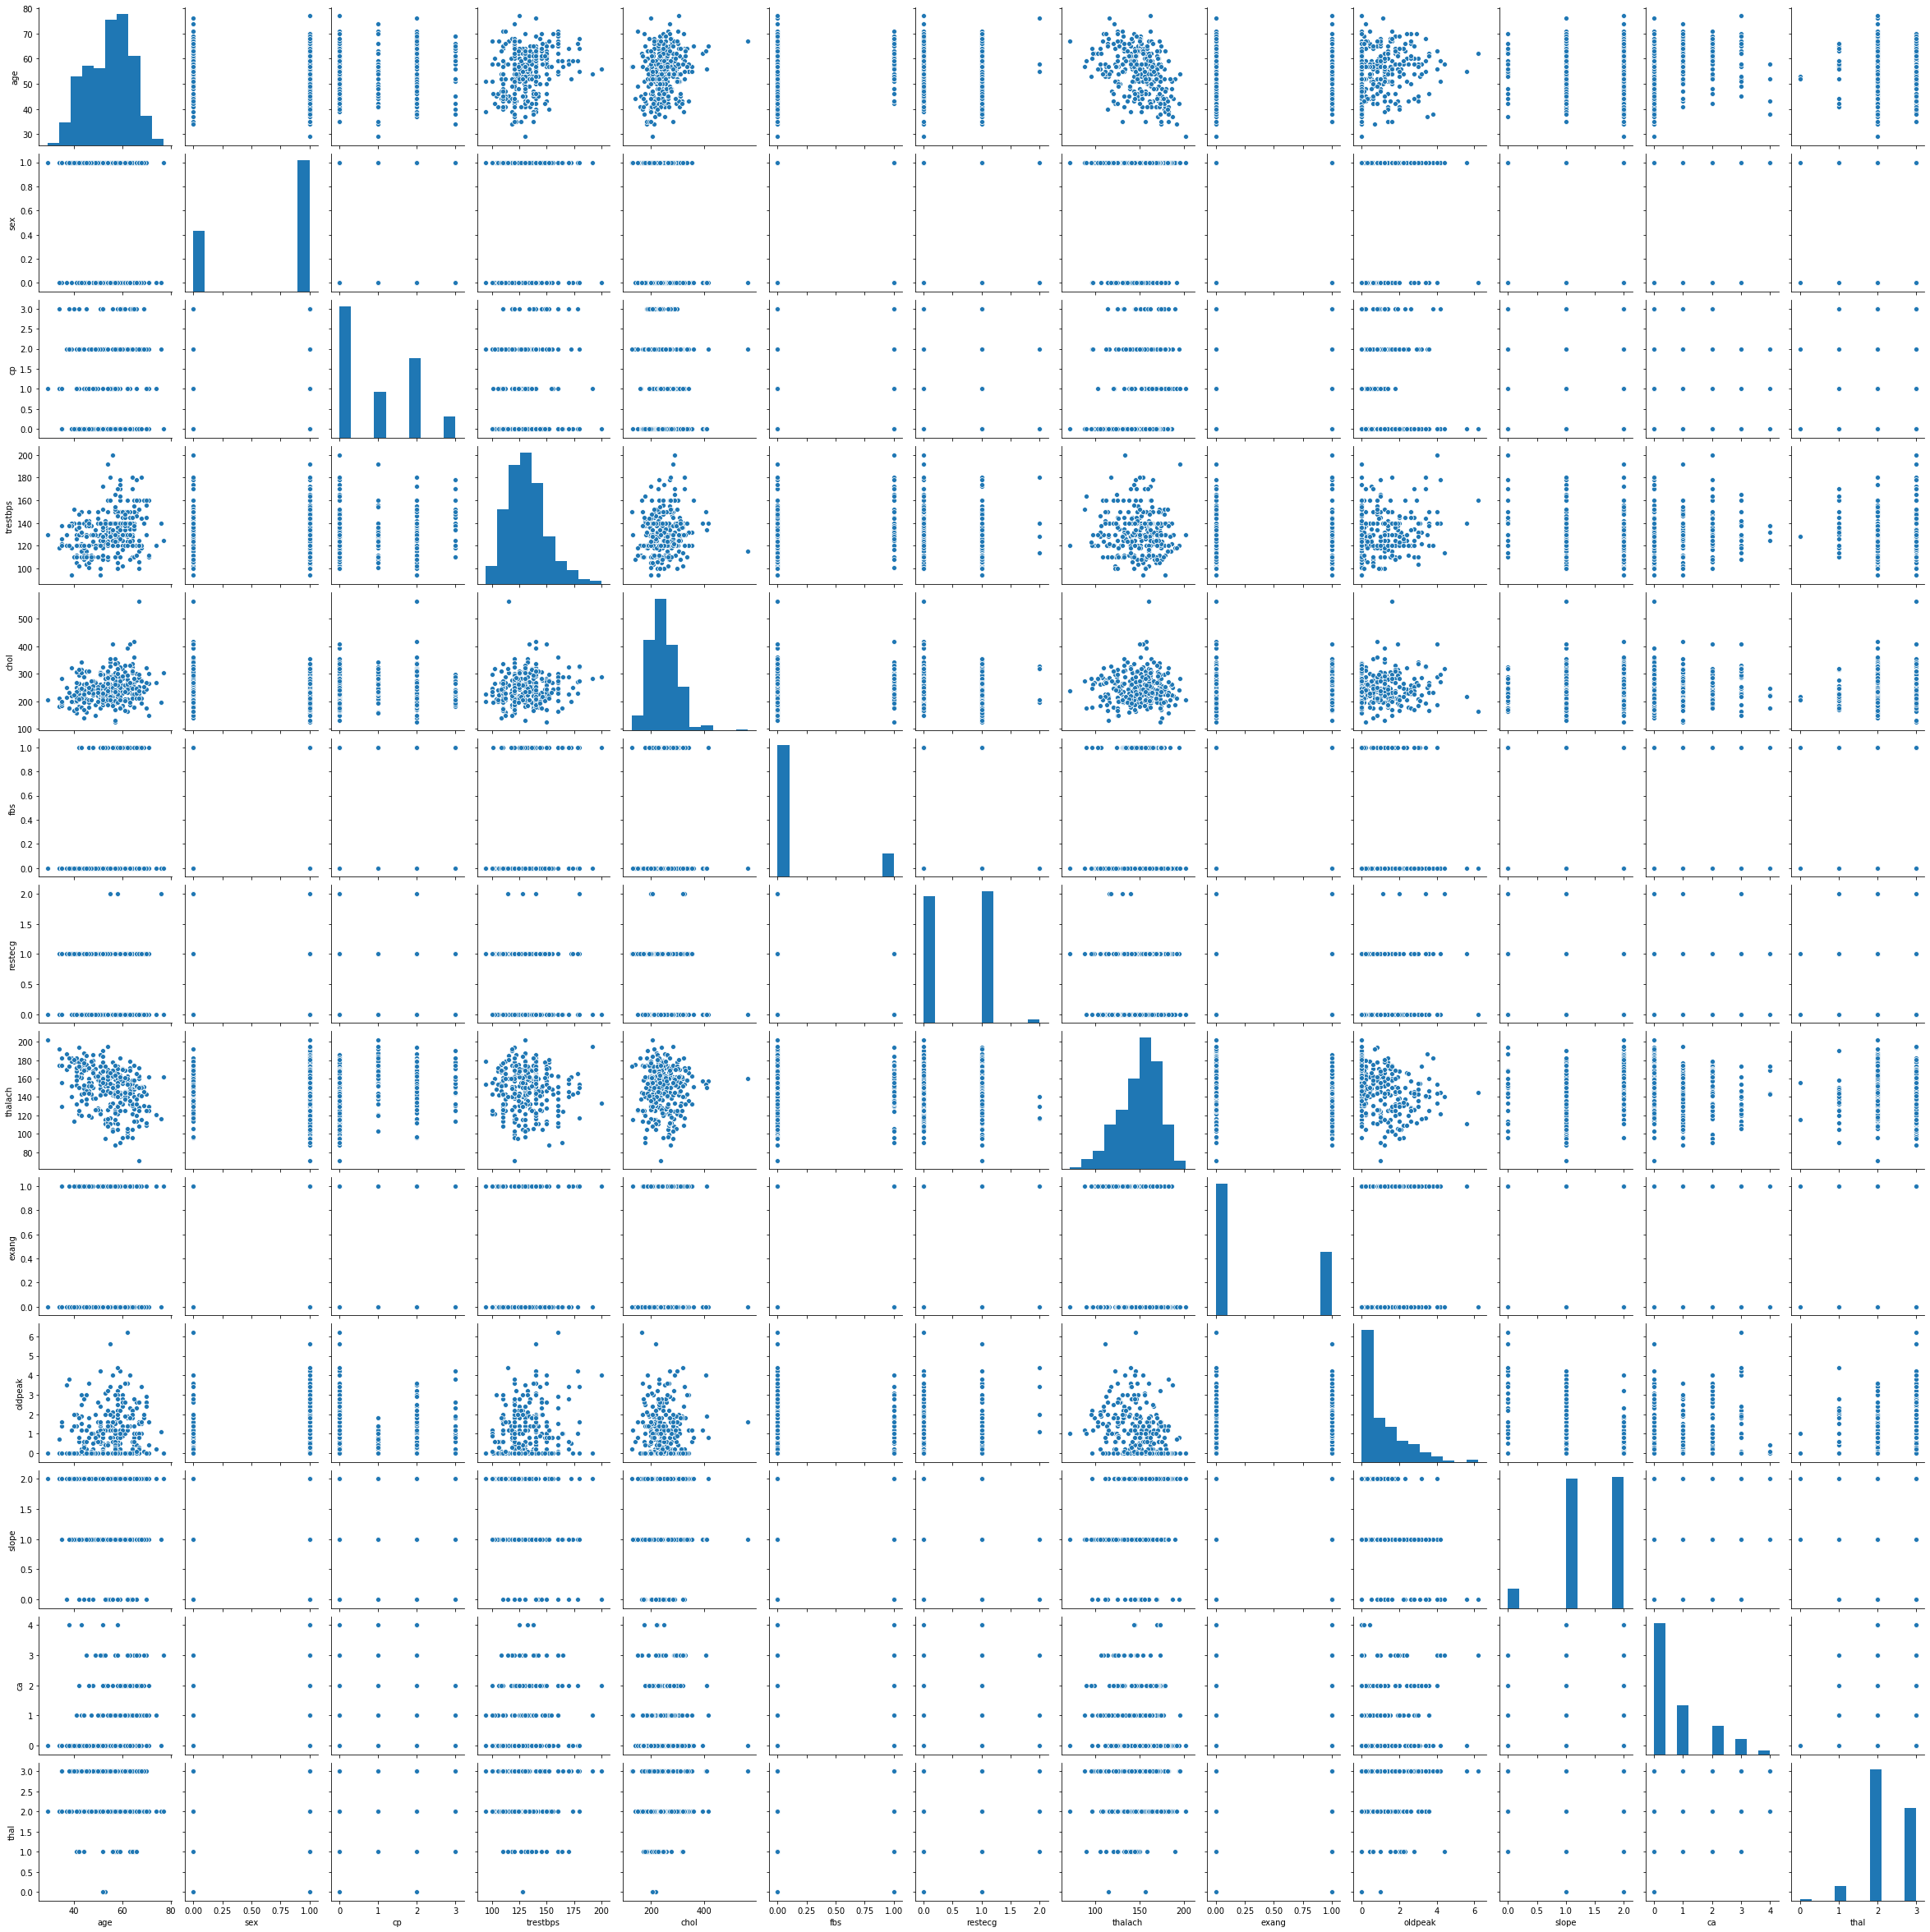

In [9]:
sns.pairplot(data)

## Splitting the Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,test_size=0.15,random_state=0)

## Model - Randon Forest Classifier

## RandomForest Claffier- Architecture:

   Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model (Here we only have 2 classes).
    
   As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.
    
   The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

The below diagram explains the working of the Random Forest algorithm:
<img src="rfc.png">

## Compiling the Model

In [11]:
rfc = RandomForestClassifier(random_state=128)

## Fitting the Model

In [12]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=128)

## Predictions & Accuracy

In [13]:
predictions = rfc.predict(X_test)

In [14]:
accuracy = accuracy_score(predictions,y_test)
print('Accuracy=',accuracy*100)

Accuracy= 84.78260869565217


In [15]:
print('Confusion Matrix:\n',confusion_matrix(predictions,y_test))

Confusion Matrix:
 [[20  4]
 [ 3 19]]


In [16]:
print('Classification Report:\n \n',classification_report(predictions,y_test))

Classification Report:
 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.83      0.86      0.84        22

    accuracy                           0.85        46
   macro avg       0.85      0.85      0.85        46
weighted avg       0.85      0.85      0.85        46

